Explained Variation for High EV Image: 1.0000
Explained Variation for Low EV Image: 0.0001


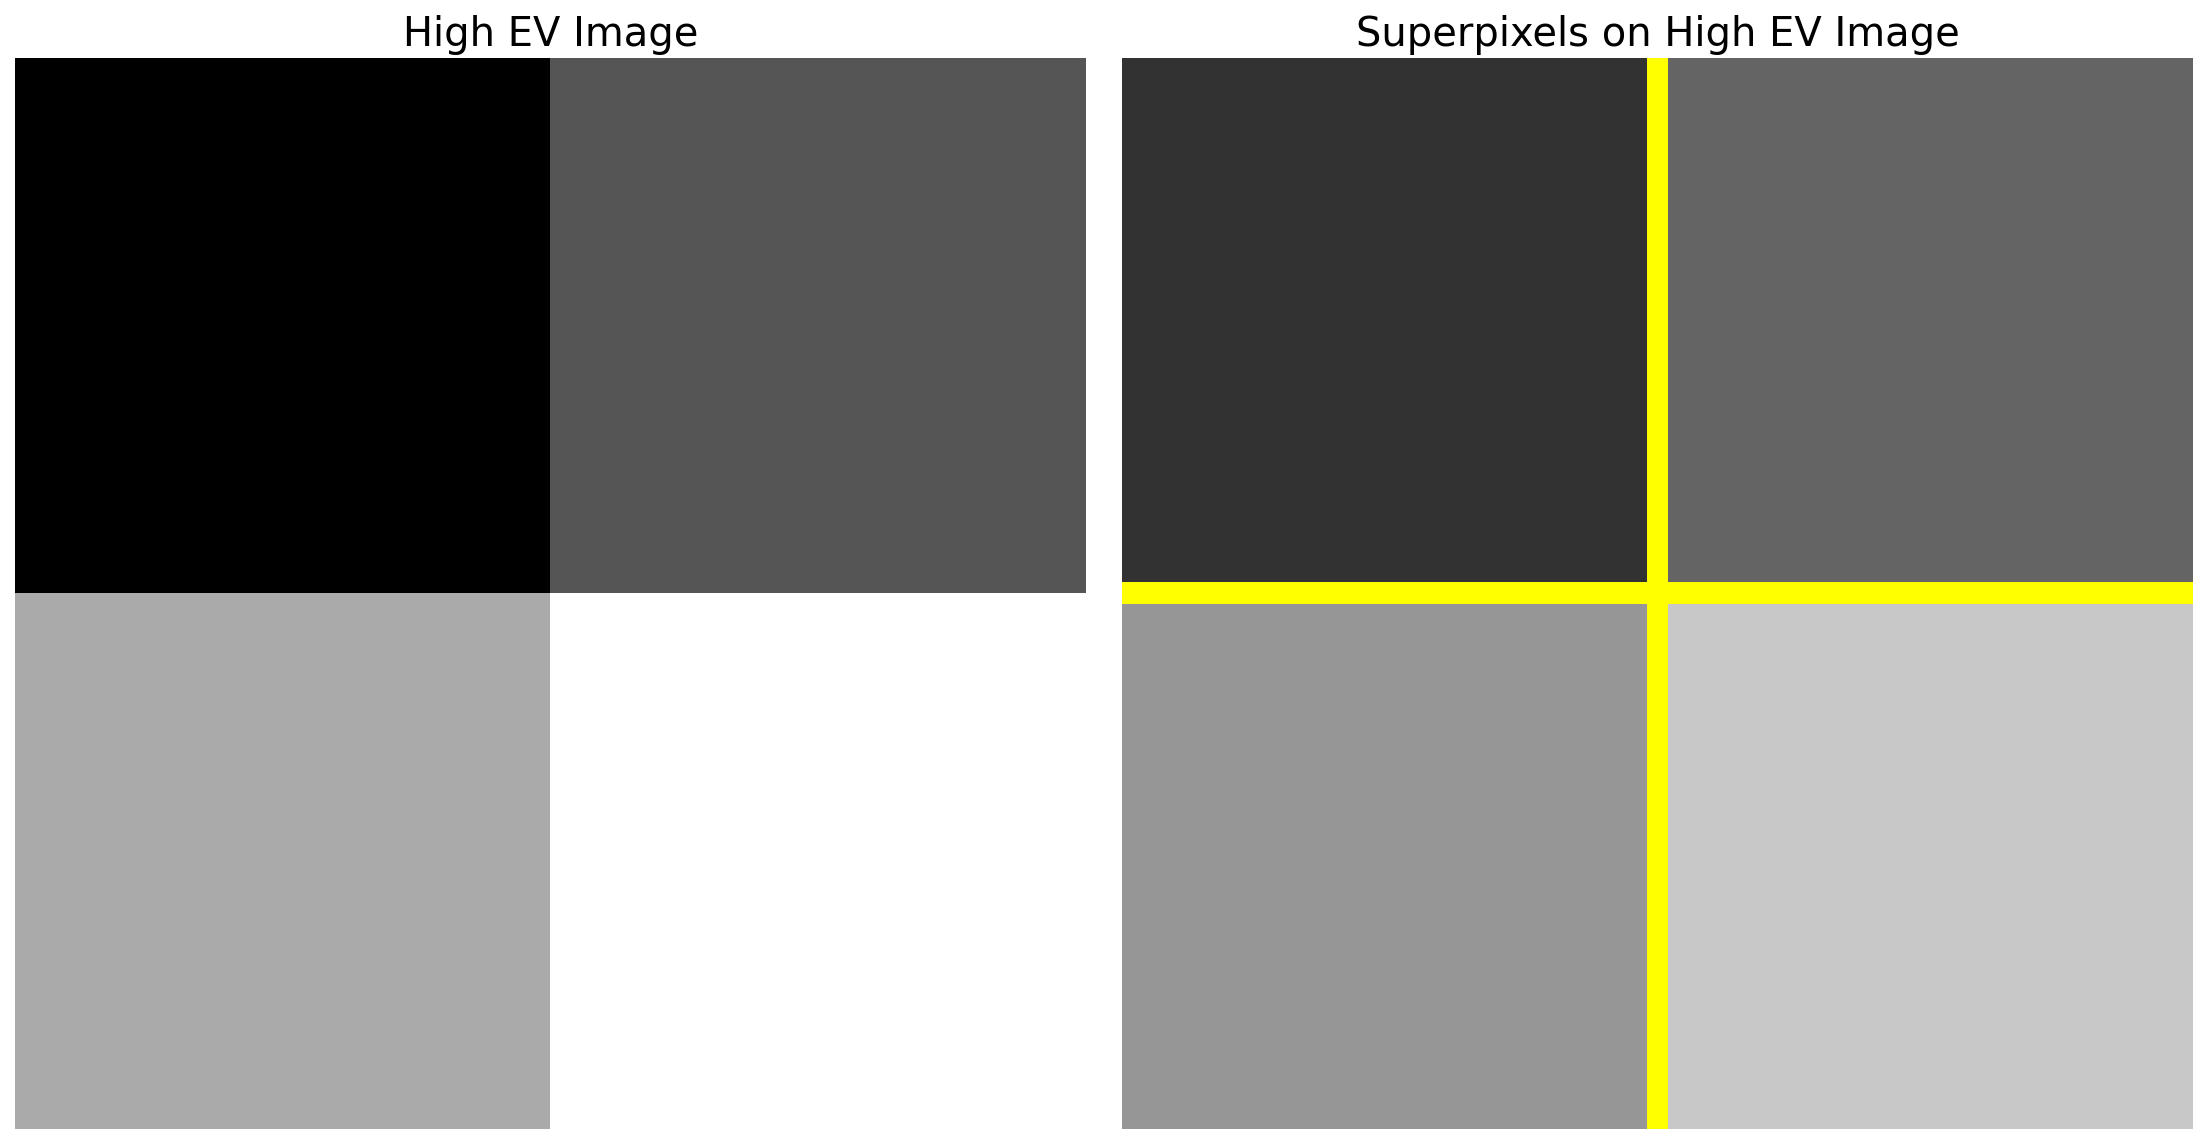

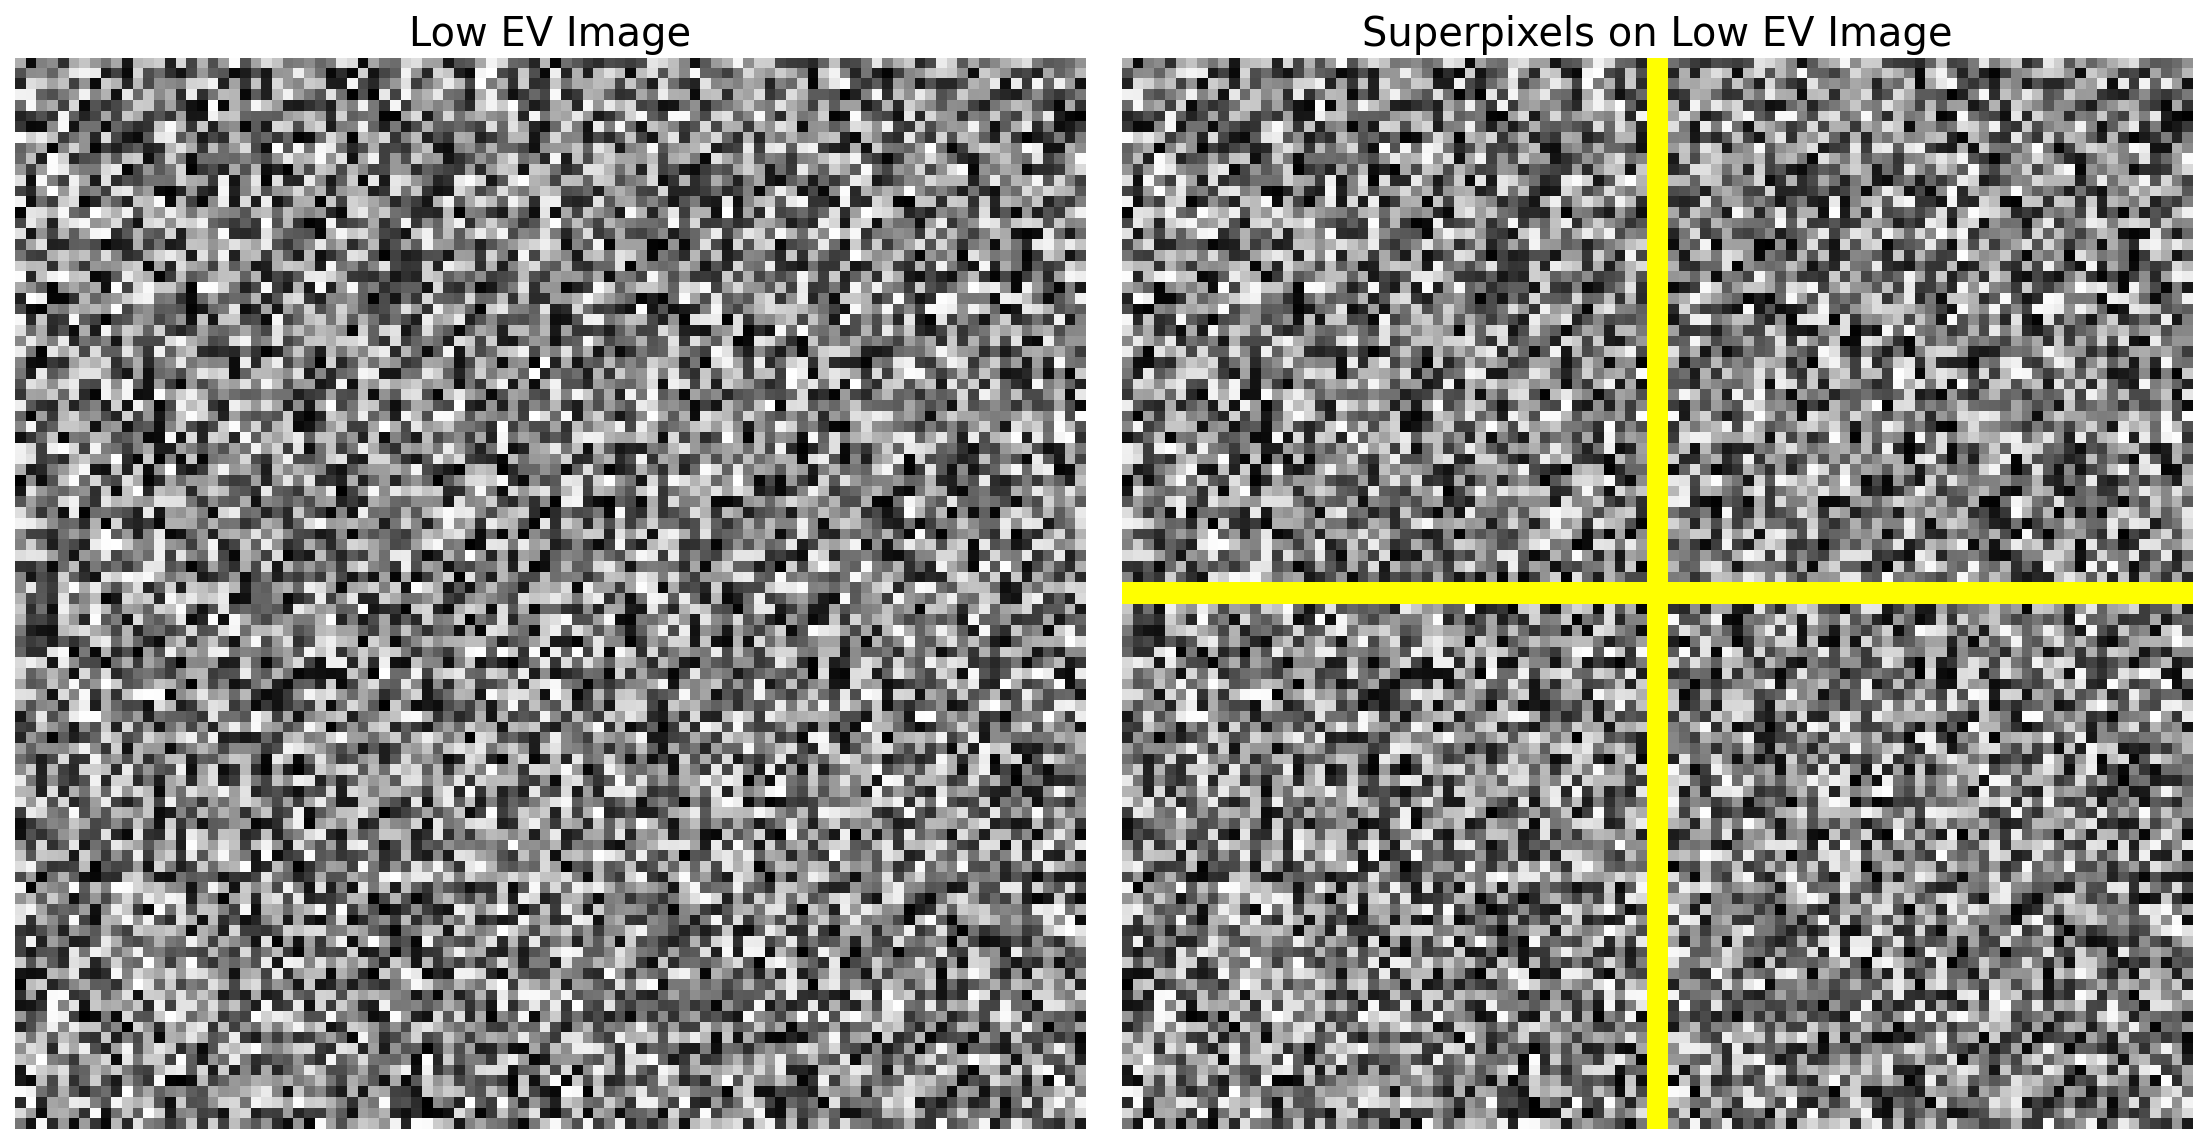

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
# Generate a simple image with large uniform regions (High EV Image)
image_high = np.zeros((100, 100), dtype=np.uint8)
image_high[0:50, 0:50] = 50     # Top-left quadrant
image_high[0:50, 50:100] = 100  # Top-right quadrant
image_high[50:100, 0:50] = 150  # Bottom-left quadrant
image_high[50:100, 50:100] = 200  # Bottom-right quadrant

# Generate an image with random noise (Low EV Image)
np.random.seed(0)  # For reproducibility
image_low = np.random.randint(0, 255, (100, 100), dtype=np.uint8)

# Apply SLIC superpixel segmentation (add channel_axis=None for grayscale images)
segments_high = slic(image_high, n_segments=4, compactness=10, sigma=1, start_label=1, channel_axis=None)
segments_low = slic(image_low, n_segments=4, compactness=10, sigma=1, start_label=1, channel_axis=None)

# Calculate mean pixel value for each image
mu_high = np.mean(image_high)
mu_low = np.mean(image_low)

# Compute Total Variation (TV)
TV_high = np.sum((image_high - mu_high) ** 2)
TV_low = np.sum((image_low - mu_low) ** 2)

# Compute Within-Superpixel Variation (WSV)
WSV_high = 0
for label in np.unique(segments_high):
    mask = segments_high == label
    mu_j = np.mean(image_high[mask])
    WSV_high += np.sum((image_high[mask] - mu_j) ** 2)

WSV_low = 0
for label in np.unique(segments_low):
    mask = segments_low == label
    mu_j = np.mean(image_low[mask])
    WSV_low += np.sum((image_low[mask] - mu_j) ** 2)

# Compute Explained Variation (EV)
EV_high = (TV_high - WSV_high) / TV_high
EV_low = (TV_low - WSV_low) / TV_low

# Print the Explained Variations
print(f'Explained Variation for High EV Image: {EV_high:.4f}')
print(f'Explained Variation for Low EV Image: {EV_low:.4f}')

# Visualize the High EV Image and its superpixels
fig1, ax1 = plt.subplots(1, 2, figsize=(15, 10), dpi=150)

ax1[0].imshow(image_high, cmap='gray')
ax1[0].set_title('High EV Image')
ax1[0].axis('off')

ax1[1].imshow(mark_boundaries(image_high, segments_high))
ax1[1].set_title('Superpixels on High EV Image')
ax1[1].axis('off')

plt.tight_layout()
plt.show()

# Visualize the Low EV Image and its superpixels
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 10), dpi=150)

ax2[0].imshow(image_low, cmap='gray')
ax2[0].set_title('Low EV Image')
ax2[0].axis('off')

ax2[1].imshow(mark_boundaries(image_low, segments_low))
ax2[1].set_title('Superpixels on Low EV Image')
ax2[1].axis('off')

plt.tight_layout()
plt.show()
